# Using MNIST_Sample Model
> MNIST_SAMPLE file

- toc: true
- branch: master
- badges: true
- comments: true
- author: Andy Leung
- categories: [fastai, cookbook]

In [2]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *


     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 189 kB 45.1 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 561 kB 45.3 MB/s 
     |████████████████████████████████| 51 kB 312 kB/s 
     |████████████████████████████████| 130 kB 45.6 MB/s 


In [3]:
# set up the notebook for fast.ai
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
#Using the MNIST_SAMPLE which only contains 3s and 7s test data
path = untar_data(URLs.MNIST_SAMPLE)


In [5]:
#Use path.ls() to locate the directories
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [6]:
%%time
# create an image dataloaders object using the path
# note that because of the directory structure of the dataset 
# the train and valid sets have to be explicitly specified
# details here: https://github.com/fastai/fastai/issues/1129
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid')
# create a learner object using the dataloaders that was just defined
# architecture is resnet18; see https://pytorch.org/hub/pytorch_vision_resnet/
# loss function is selected for multi class classification
# accuracy is the metric used to optimize
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
# fit the model for one epoch using 1cycle policy
# see https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle
learn.fit_one_cycle(1, 0.1)



epoch,train_loss,valid_loss,accuracy,time
0,0.308383,0.231135,0.989696,00:26


CPU times: user 19.1 s, sys: 1.74 s, total: 20.9 s
Wall time: 38.4 s


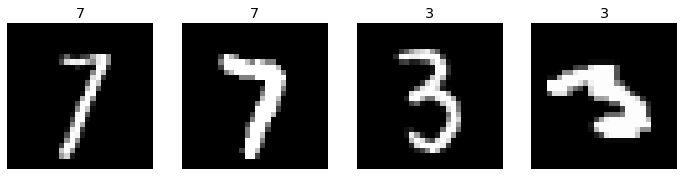

In [7]:
dls.train.show_batch(max_n=4, nrows=1)

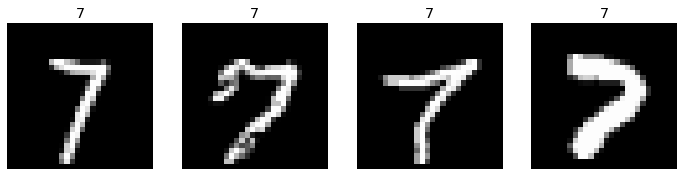

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)


In [16]:
#Find out the size of the validation set
img_files = get_image_files(path/"valid")
len(img_files)




2038

In [13]:
path

Path('/root/.fastai/data/mnist_sample')

In [15]:
#Find out the size of training set
img_files = get_image_files(path/"train")
len(img_files)

12396

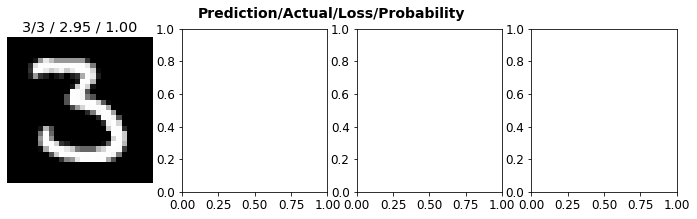

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1)


In [18]:
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 7 x 7     
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                        

In [19]:
img = PILImage.create(img_files[0])
img

In [20]:
learn.predict(img)

('7', TensorBase(1), TensorBase([0.0566, 0.9434]))

In [21]:
#Use another image to validate
img = PILImage.create(img_files[100])
img

In [22]:
learn.predict(img)

('7', TensorBase(1), TensorBase([0.0669, 0.9331]))

In [27]:
img = PILImage.create(img_files[1888])
img

In [28]:
learn.predict(img)

('3', TensorBase(0), TensorBase([0.9480, 0.0520]))